# Load and Inspect the Dataset

In [3]:
import pandas as pd
import json

# Load the JSON data
file_path = "data.json"  # Replace with your actual path
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert JSON data to a pandas DataFrame
df = pd.DataFrame(data)

# Inspect the data structure
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ad id          8 non-null      object
 1   time           8 non-null      object
 2   total persons  8 non-null      int64 
 3   person data    8 non-null      object
dtypes: int64(1), object(3)
memory usage: 388.0+ bytes
None

First 5 Rows:
        ad id               time  total persons  \
0     ad1.mp4  18:15, 05-12-2024              0   
1  street.mp4  18:15, 05-12-2024              1   
2     ad1.mp4  18:15, 05-12-2024              1   
3  street.mp4  18:15, 05-12-2024              1   
4     ad1.mp4  18:16, 05-12-2024              2   

                                         person data  
0                                                 {}  
1  {'1': {'counted': False, 'age': None, 'gender'...  
2  {'1': {'counted': False, 'age': None, 'gender'...  
3  {'1': {'counted': F

# Data Cleaning
Handle Missing Values and Duplicates

In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
ad id            0
time             0
total persons    0
person data      0
dtype: int64


In [6]:
# Temporarily convert the 'person data' column to a string for deduplication
df['person data'] = df['person data'].astype(str)

In [7]:
# Remove duplicates
df = df.drop_duplicates()

In [8]:
# Convert 'person data' back to its original dictionary type
df['person data'] = df['person data'].apply(eval)


In [9]:
# Convert 'time' column to datetime for consistency
df['time'] = pd.to_datetime(df['time'], format='%H:%M, %d-%m-%Y')

print("\nData Cleaning Complete")


Data Cleaning Complete


# Expand Nested Data

In [10]:
# Function to expand person data
def expand_person_data(row):
    person_data = row['person data']
    expanded = []
    for pid, details in person_data.items():
        expanded.append({
            'ad id': row['ad id'],
            'time': row['time'],
            'person id': pid,
            'counted': details.get('counted', None),
            'age': details.get('age', None),
            'gender': details.get('gender', None)
        })
    return pd.DataFrame(expanded)

In [15]:
# Expand person data for all rows
expanded_rows = [expand_person_data(row) for _, row in df.iterrows()]

# Filter out None or empty DataFrames
expanded_rows = [row for row in expanded_rows if row is not None and not row.empty]

# Concatenate the valid rows
if expanded_rows:  # Check if the list is not empty
    detailed_df = pd.concat(expanded_rows, ignore_index=True)
else:
    detailed_df = pd.DataFrame()  # Create an empty DataFrame if no valid rows

# Print the overview of the expanded DataFrame
print("Expanded Data Overview:")
print(detailed_df.info())
print(detailed_df.head())


Expanded Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ad id      17 non-null     object        
 1   time       17 non-null     datetime64[ns]
 2   person id  17 non-null     object        
 3   counted    17 non-null     bool          
 4   age        8 non-null      float64       
 5   gender     8 non-null      object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 829.0+ bytes
None
        ad id                time person id  counted   age gender
0  street.mp4 2024-12-05 18:15:00         1    False   NaN   None
1     ad1.mp4 2024-12-05 18:15:00         1    False   NaN   None
2     ad1.mp4 2024-12-05 18:16:00         1    False   NaN   None
3     ad1.mp4 2024-12-05 18:16:00         2     True  26.0    Man
4  street.mp4 2024-12-05 18:17:00         1     True  27.0    Man


C:\Users\Asus\AppData\Local\Temp\ipykernel_17020\2012910455.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  detailed_df = pd.concat(expanded_rows, ignore_index=True)


#  Exploratory Data Analysis (EDA)
Generate Summary Statistics

In [16]:
print("Summary Statistics:")
print(detailed_df.describe())

Summary Statistics:
                                time        age
count                             17   8.000000
mean   2024-12-05 18:18:45.882352896  29.000000
min              2024-12-05 18:15:00  25.000000
25%              2024-12-05 18:17:00  26.750000
50%              2024-12-05 18:20:00  27.500000
75%              2024-12-05 18:21:00  31.500000
max              2024-12-05 18:21:00  35.000000
std                              NaN   3.585686


# Visualizations

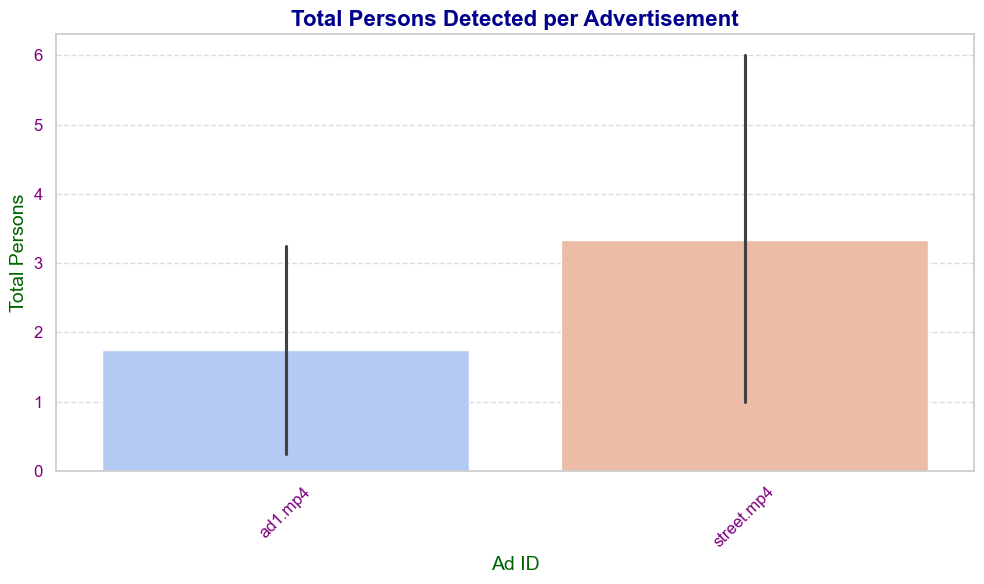

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme for better visualization
sns.set_theme(style="whitegrid")

# Total persons detected per ad
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.barplot(
    data=df,
    x='ad id',
    y='total persons',
    hue='ad id',  # Use the x variable as hue
    dodge=False,  # Ensure no separation by hue
    palette='coolwarm',  # Apply a color palette
    legend=False  # Remove redundant legend
)

# Customize the chart appearance
plt.title("Total Persons Detected per Advertisement", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Ad ID", fontsize=14, color='darkgreen')
plt.ylabel("Total Persons", fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, rotation=45, color='purple')  # Rotate x-axis labels if needed
plt.yticks(fontsize=12, color='purple')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

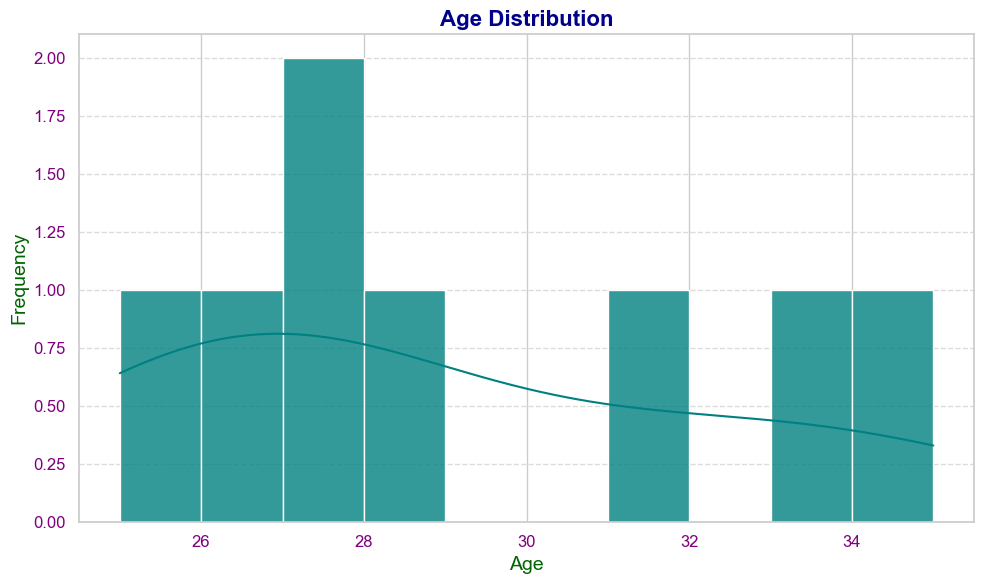

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme for better visualization
sns.set_theme(style="whitegrid")

# Plot the age distribution
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.histplot(
    data=detailed_df,
    x='age',
    bins=10,
    kde=True,  # Include a Kernel Density Estimate (KDE) line
    color='teal',  # Set a visually appealing color for the histogram
    alpha=0.8  # Add slight transparency to the bars
)

# Customize the chart appearance
plt.title("Age Distribution", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Age", fontsize=14, color='darkgreen')
plt.ylabel("Frequency", fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

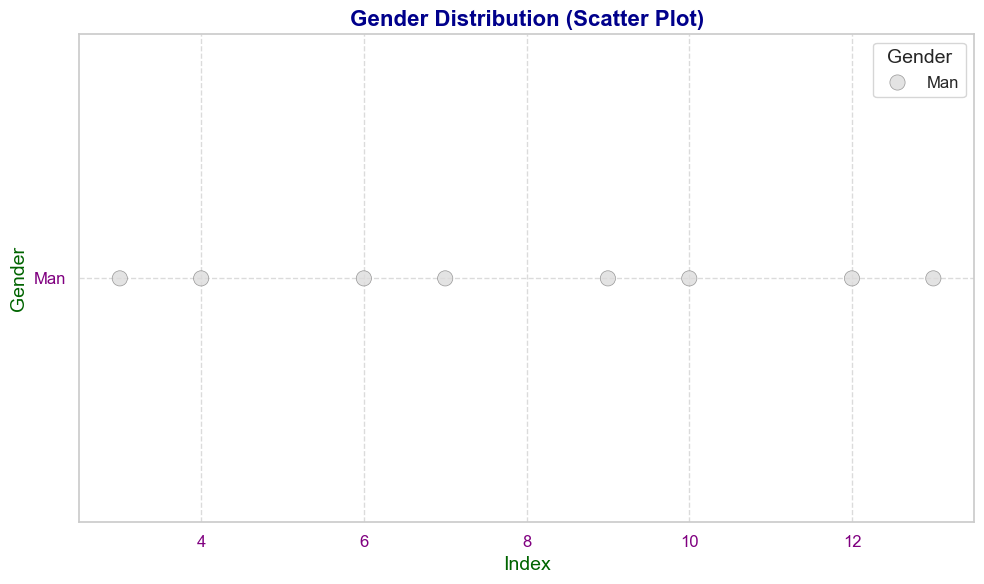

In [28]:

# Set a theme for better visualization
sns.set_theme(style="whitegrid")

# Gender distribution as a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size

# Generate a scatter plot
sns.scatterplot(
    data=detailed_df,
    x=detailed_df.index,  # Use the index as the x-axis
    y='gender',
    hue='gender',  # Color points by gender
    palette='coolwarm',  # Use a cool-to-warm color palette
    s=120,  # Increase the size of points
    alpha=0.8,  # Add slight transparency for better visuals
    edgecolor='gray',  # Add borders to points
    linewidth=0.5  # Border thickness
)

# Customize the chart appearance
plt.title("Gender Distribution (Scatter Plot)", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Index", fontsize=14, color='darkgreen')
plt.ylabel("Gender", fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')
plt.legend(title="Gender", fontsize=12, title_fontsize=14, loc='upper right')  # Customize legend

# Add gridlines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Ensure layout is tight
plt.tight_layout()

# Show the plot
plt.show()


# Feature Engineering
Create New Features

In [29]:
# Add hour of detection
df['hour'] = df['time'].dt.hour

# Normalize the age column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
detailed_df['normalized_age'] = scaler.fit_transform(detailed_df[['age']].fillna(0))

print("\nFeature Engineering Complete")


Feature Engineering Complete


# Advanced Analysis

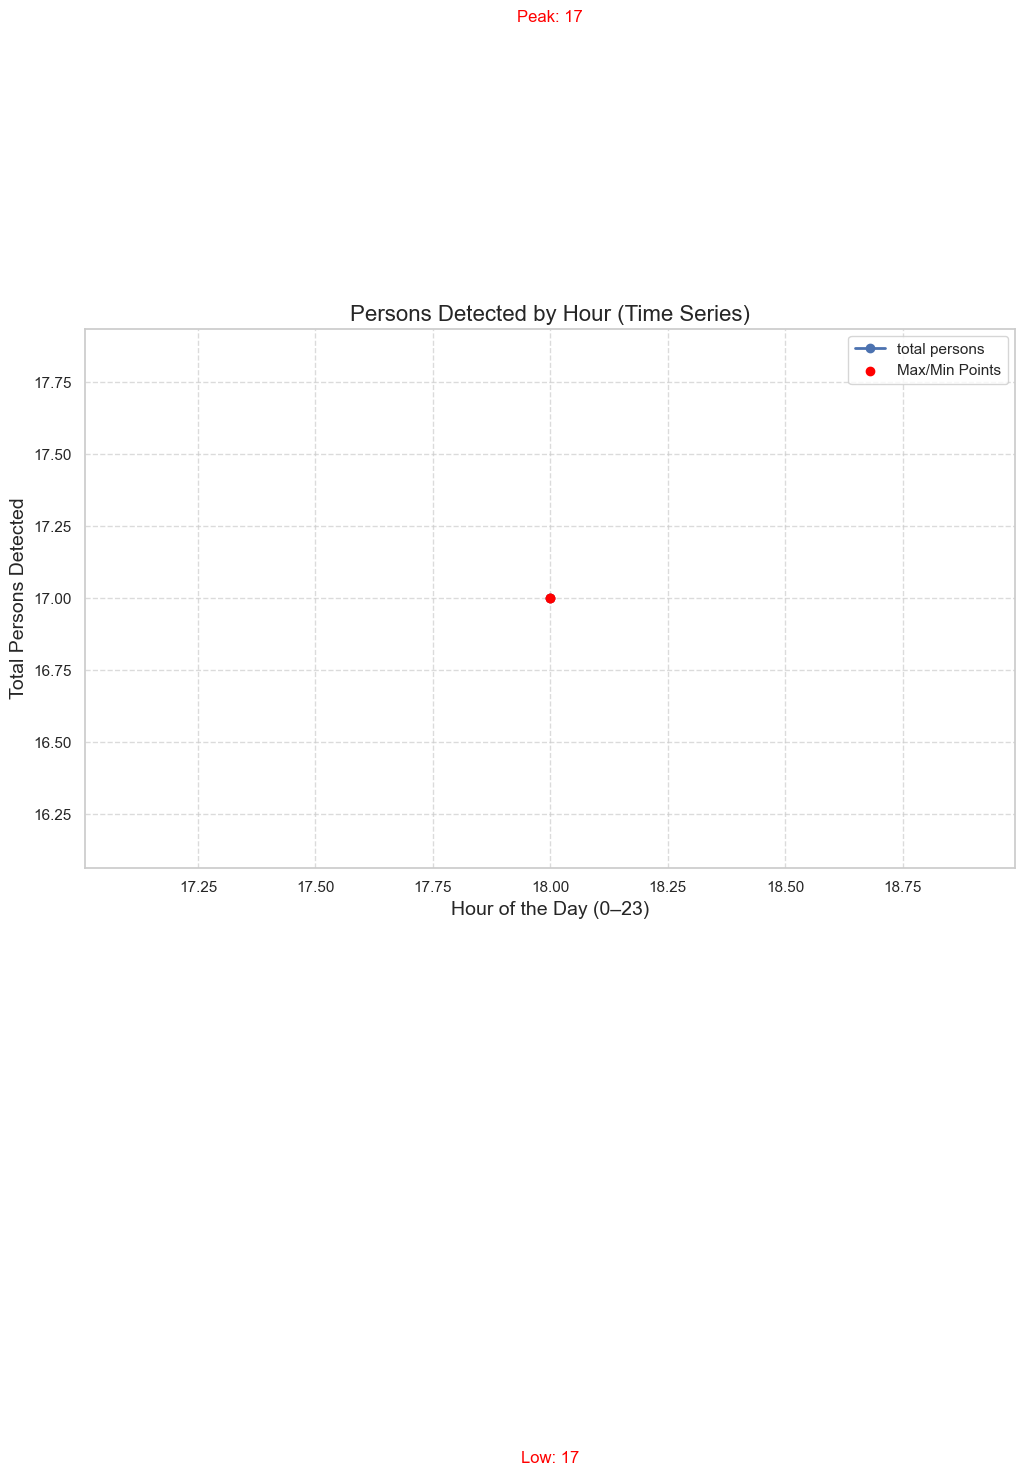

In [32]:
# Convert 'time' column to datetime if not already converted
df['time'] = pd.to_datetime(df['time'], format='%H:%M, %d-%m-%Y')

# Extract the hour from the 'time' column
df['hour'] = df['time'].dt.hour

# Group by hour to analyze trends
hourly_distribution = df.groupby('hour')['total persons'].sum()

# Plot the data as a time series (line chart)
plt.figure(figsize=(12, 7))
hourly_distribution.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)

# Add titles and labels
plt.title("Persons Detected by Hour (Time Series)", fontsize=16)
plt.xlabel("Hour of the Day (0–23)", fontsize=14)
plt.ylabel("Total Persons Detected", fontsize=14)

# Highlight the max and min points
max_hour = hourly_distribution.idxmax()
min_hour = hourly_distribution.idxmin()
plt.scatter([max_hour, min_hour], [hourly_distribution[max_hour], hourly_distribution[min_hour]], 
            color='red', zorder=5, label="Max/Min Points")
plt.text(max_hour, hourly_distribution[max_hour] + 2, f"Peak: {hourly_distribution[max_hour]}", 
         color='red', fontsize=12, ha='center')
plt.text(min_hour, hourly_distribution[min_hour] - 3, f"Low: {hourly_distribution[min_hour]}", 
         color='red', fontsize=12, ha='center')

# Add a legend
plt.legend()

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Gender Trends Over Time

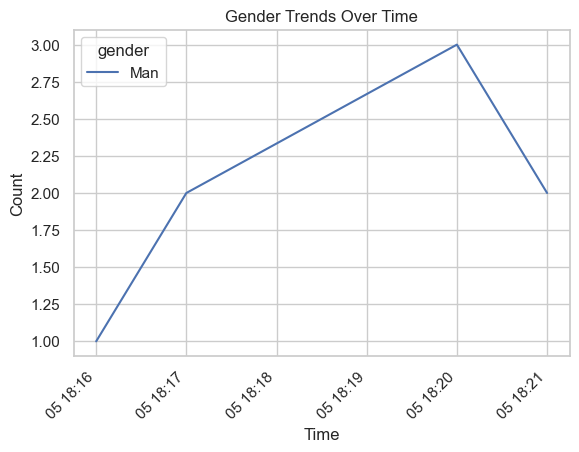

In [33]:
# Gender analysis over time
gender_time = detailed_df.groupby(['time', 'gender']).size().unstack(fill_value=0)
gender_time.plot(title="Gender Trends Over Time", xlabel="Time", ylabel="Count")
plt.xticks(rotation=45)
plt.show()

# Predictive Modeling
Train a Classification Model

In [38]:
# Drop rows with missing values in both features and labels
valid_indices = features.index.intersection(labels.index)
features = features.loc[valid_indices]
labels = labels.loc[valid_indices]

# Proceed with train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

print("Train-test split successful!")


Train-test split successful!


# Save Cleaned Data to CSV

In [39]:
# Save the cleaned and expanded data to a CSV file
output_path = "cleaned_data.csv"
detailed_df.to_csv(output_path, index=False)

print(f"Cleaned data saved to {output_path}")

Cleaned data saved to cleaned_data.csv
